<a href="https://www.kaggle.com/code/muhammadasifwazir/s02-multiple-linear-regression?scriptVersionId=193222492" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Multiple Linear Regression

# Import libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

# Import data

In [2]:
# Get dataset
df_start = pd.read_csv('/kaggle/input/50-usa-startups-dataset/50_Startups.csv')

# Generate a synthetic dataset
np.random.seed(0)
n_samples = 500
X1 = np.random.rand(n_samples) * 100  # Feature 1: R&D Spend
X2 = np.random.rand(n_samples) * 100  # Feature 2: Administration
X3 = np.random.rand(n_samples) * 100  # Feature 3: Marketing Spend
X4 = np.random.choice(['New York', 'California', 'Florida'], n_samples)  # Feature 4: State
y = 5 * X1 + 3 * X2 + 4 * X3 + np.random.randn(n_samples) * 100  # Target variable: Profit

# Create a DataFrame
df_start = pd.DataFrame({'R&D Spend': X1, 'Administration': X2, 'Marketing Spend': X3, 'State': X4, 'Profit': y})

df_start.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,54.881350,31.038083,59.288027,California,681.550173
1,71.518937,37.303486,1.006370,California,431.397862
2,60.276338,52.497044,47.582620,New York,602.272225
3,54.488318,75.059502,70.877039,Florida,868.697823
4,42.365480,33.350747,4.397543,Florida,192.953524


In [3]:
df_start.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        500 non-null    float64
 1   Administration   500 non-null    float64
 2   Marketing Spend  500 non-null    float64
 3   State            500 non-null    object 
 4   Profit           500 non-null    float64
dtypes: float64(4), object(1)
memory usage: 19.7+ KB


# Analyze data

## Describe

In [4]:
# Describe data
df_start.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,500.000000,500.000000,500.000000,500.000000
mean,49.659764,49.524543,51.137825,599.473448
std,29.175642,29.001916,30.193272,229.460475
min,0.469548,0.054596,0.066422,16.949061
25%,24.782590,24.761346,26.442912,431.894750
50%,48.684194,47.972272,51.953567,600.341927
75%,73.074578,73.993732,77.572888,762.739530
max,99.884701,99.980858,99.802279,1236.856504


## Distribution

/tmp/ipykernel_18/2467018415.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_start['Profit'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


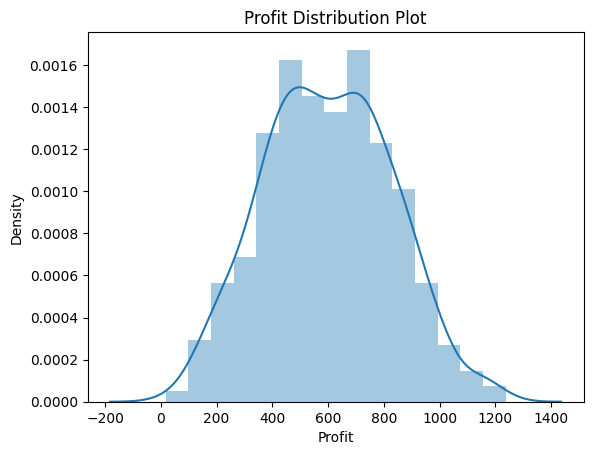

In [5]:
# Data distribution
plt.title('Profit Distribution Plot')
sns.distplot(df_start['Profit'])
plt.show()

## Relationship between Profit and R&D Spend

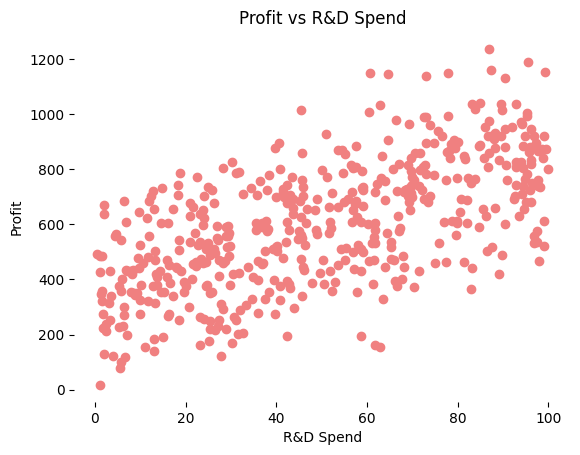

In [6]:
# Relationship between Profit and R&D Spend
plt.scatter(df_start['R&D Spend'], df_start['Profit'], color = 'lightcoral')
plt.title('Profit vs R&D Spend')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.box(False)
plt.show()

# Split into Independent/Dependent variables

In [7]:
# Split dataset in dependent/independent variables
X = df_start.iloc[:, :-1].values
y = df_start.iloc[:, -1].values

In [8]:
X

array([[54.88135039273247, 31.03808259798114, 59.28802707811576,
        'California'],
       [71.51893663724195, 37.303486388074745, 1.006369565609333,
        'California'],
       [60.276337607164386, 52.49704422542643, 47.58261958572228,
        'New York'],
       ...,
       [40.17135353795987, 93.84120216943856, 11.224999258738599,
        'Florida'],
       [24.8413465082971, 22.864655098294552, 4.236404709144326,
        'New York'],
       [50.586638382530836, 67.71411441114242, 22.774099334728646,
        'Florida']], dtype=object)

In [9]:
y

array([ 681.55017251,  431.39786188,  602.27222543,  868.69782263,
        192.95352449, 1146.71314401,  637.49753216,  420.43291418,
        749.81205661,  777.90121909,  905.30175079,  390.85868533,
        609.02867528,  701.70251584,  197.40315764,  349.22624656,
        222.49305767,  441.87173169,  993.46747626,  858.41220263,
        466.52599707,  613.74669535,  435.27520043,  867.82635096,
        482.64326498,  757.31842167,  429.54433189,  884.14650828,
        714.69989427,  478.71270075,  217.20693834,  462.38556965,
        858.88154131,  500.45188903,  222.55706198,  533.62507921,
        532.91799151,  716.78008503,  805.29682129,  716.08274898,
        277.95753348,  659.53702526,  794.35929964,  400.00557492,
        719.86252972,  575.96928323,  629.24692603,  721.45902355,
        201.32496131,  757.82095115,  809.41663425,  297.54096453,
        839.57165588,  379.09750309,  675.93491751,  266.20767359,
        519.28080054,  489.55675703,  605.76881792,  511.70235

# One-hot encoding

In [10]:
# One-hot encoding of categorical data
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [3])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))

In [11]:
X

array([[1.0, 0.0, 0.0, 54.88135039273247, 31.03808259798114,
        59.28802707811576],
       [1.0, 0.0, 0.0, 71.51893663724195, 37.303486388074745,
        1.006369565609333],
       [0.0, 0.0, 1.0, 60.276337607164386, 52.49704422542643,
        47.58261958572228],
       ...,
       [0.0, 1.0, 0.0, 40.17135353795987, 93.84120216943856,
        11.224999258738599],
       [0.0, 0.0, 1.0, 24.8413465082971, 22.864655098294552,
        4.236404709144326],
       [0.0, 1.0, 0.0, 50.586638382530836, 67.71411441114242,
        22.774099334728646]], dtype=object)

# Split into Train/Test sets

In [12]:
# Split dataset into test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Train model

In [13]:
# Train multiple regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

# Predict results

In [14]:
# Predict result
y_pred = regressor.predict(X_test)

# Compare predictions

In [15]:
# Compare predicted result with actual value
np.set_printoptions(precision = 2)
result = np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1)
result

array([[ 538.1 ,  791.  ],
       [ 760.8 ,  602.9 ],
       [ 310.41,  346.87],
       [ 307.34,  408.12],
       [ 713.68,  726.45],
       [ 416.56,  349.23],
       [ 587.5 ,  534.83],
       [ 661.82,  786.19],
       [ 592.35,  609.97],
       [ 473.41,  470.37],
       [ 425.89,  322.08],
       [ 567.26,  603.6 ],
       [ 229.72,  232.38],
       [ 488.69,  445.45],
       [ 303.05,  228.15],
       [ 588.42,  577.39],
       [ 692.39,  764.37],
       [ 599.62,  444.79],
       [ 642.12,  704.19],
       [ 632.12,  716.78],
       [ 197.46,  119.19],
       [ 764.36,  808.49],
       [ 544.11,  504.02],
       [ 462.  ,  464.73],
       [ 493.78,  575.97],
       [ 787.25,  860.11],
       [ 729.8 ,  613.75],
       [ 379.01,  517.52],
       [ 410.61,  192.93],
       [ 232.77,  212.52],
       [ 838.08,  839.33],
       [ 894.17,  933.06],
       [ 749.21,  740.99],
       [ 443.84,  534.07],
       [ 280.52,  255.64],
       [ 648.39,  488.71],
       [ 296.89,  354.4 ],
 

In [16]:
# Model evaluation
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 9900.889452889101
R-squared: 0.8070665720988646
